# Employee Attrition Prediction

Predict attrition of your valuable employees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style("whitegrid")

print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sns.__version__)

1.19.2
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.11.2


In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Note: The dependent/target variable is Attrition

## EDA

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
display(df.iloc[0])

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [6]:
# check if there are null values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
pd.options.display.float_format = "{:,.2f}".format
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Observations made from the basic statistical information printed by the describe function

- <strong>EmployeeCount</strong>: All the values are 1, therfore it is not relevant in building our machine learning model. so i drop it.
- <strong>EmployeeNumber</strong>: Sequential count, little information, Drop this column
- <strong>StandardHours</strong>: All the values are 80. Little information here. Drop this column

In [8]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ["EmployeeCount", "EmployeeNumber","StandardHours"]
col_numerical = [e for e in num_col if e not in remove_list]

Alternative method to identify categorical columns:

In [9]:
categorical_col = []
for k, v in df.iteritems():
    if v.dtype == "object":
        categorical_col.append(k)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [10]:
print(len(num_col))
print(len(col_numerical))
print(len(col_categorical))

26
23
9


In [11]:
df[col_numerical].corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,0.03,0.15,-0.03,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


<AxesSubplot:>

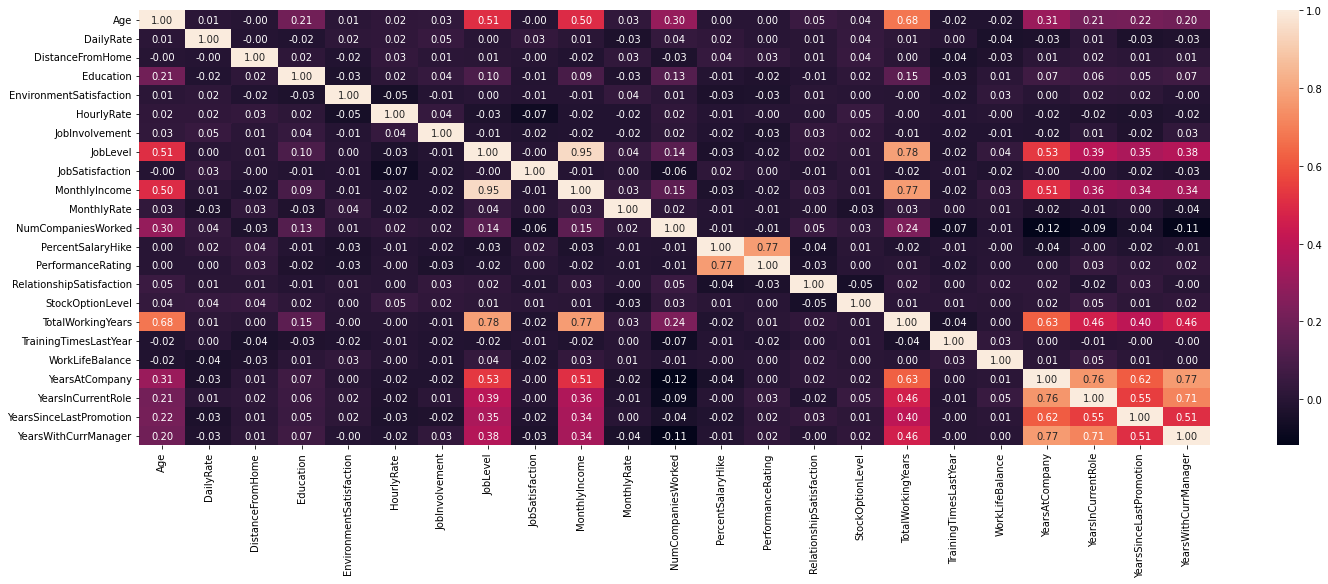

In [12]:
plt.figure(figsize=(24,8))
sns.heatmap(df[col_numerical].corr(), annot=True, fmt=".2f")

<AxesSubplot:>

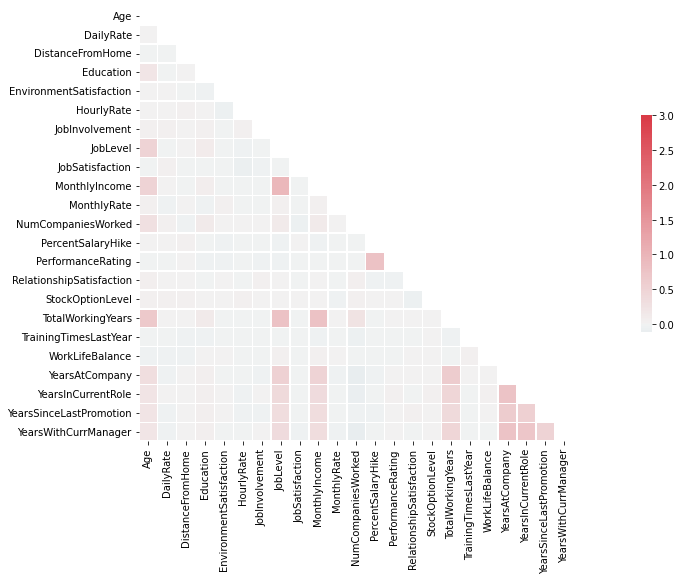

In [13]:
plt.figure(figsize=(24,8))
# Mask for the upper triangle
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap= sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap with mask and correct aspect ratio
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, vmax=3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

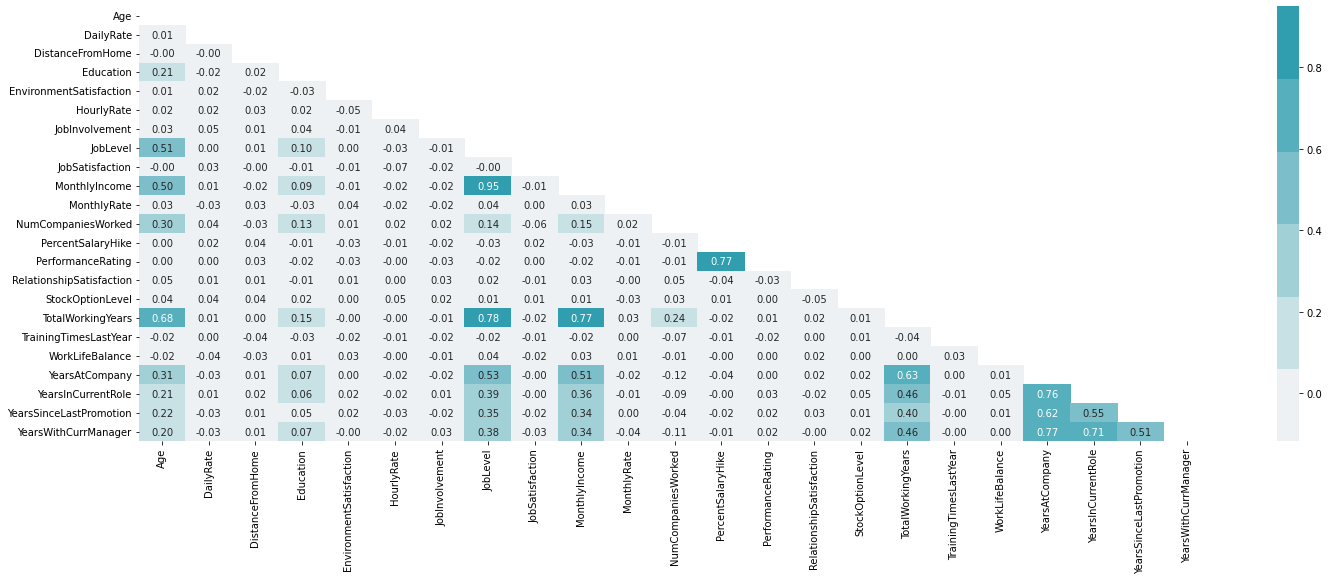

In [14]:
plt.figure(figsize=(24,8))
# Mask for the upper triangle
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap= sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
from matplotlib import pyplot as plt  

# plt.figure(figsize=(15,16))
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f")

There are some points to note from the correlation matrix. The correlation coefficient is on the higher side. I used 0.7 as my land in the sand. i.e., Higher than 0.7 is closely correlated. This part is subjective. I am using 0.7 as a guide to inform me to investigate further.

E.g

- Monthly Income and Job Level
- Total Working Years and Job Level
- Total Working years and Monthly Income
- Performance Rating and Percent Salary Hike,
- Years in Current Role and Years at Company
- Years with Current manager and Years at Company,
- Years with Current Manager and Years in Current Role

In [15]:
col_categorical # Note this is same as the search method we performed earlier. We can bring up categorical_col to compare

['EducationField',
 'OverTime',
 'MaritalStatus',
 'Over18',
 'BusinessTravel',
 'Gender',
 'Department',
 'Attrition',
 'JobRole']

In [16]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [17]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
attrition_to_num = {"Yes" : 0, "No" : 1}

In [19]:
df["Attrition_to_num"] = df["Attrition"].map(attrition_to_num)

Some useful references

<ol>
    <li> get_dummies or labelEncoder</li>
    <li>Encoding Categorical features</li>
</ol>

Point to note:
- Perfomr one hot encoding before train-test-split. Thid is fine as you are just transforming the data. There is no leakage here.
- Perfomr data processing after train-test-split because standardization etc. learn from the data by calculating mean, standard deviation etc.

In [20]:
col_categorical

['EducationField',
 'OverTime',
 'MaritalStatus',
 'Over18',
 'BusinessTravel',
 'Gender',
 'Department',
 'Attrition',
 'JobRole']

In [21]:
col_categorical.remove("Attrition")
col_categorical

['EducationField',
 'OverTime',
 'MaritalStatus',
 'Over18',
 'BusinessTravel',
 'Gender',
 'Department',
 'JobRole']

In [22]:
df_cat = pd.get_dummies(df[col_categorical])
df_cat.head()

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [23]:
X = pd.concat([df[col_numerical], df_cat], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [24]:
y = df["Attrition"]
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [25]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

# Decision Tree

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf = DecisionTreeClassifier(random_state=42)

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [33]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       991
         Yes       1.00      1.00      1.00       185

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [34]:
confusion_matrix(y_train, clf.predict(X_train))

array([[991,   0],
       [  0, 185]], dtype=int64)

In [35]:
accuracy_score(y_test, clf.predict(X_test))

0.7891156462585034

In [36]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       242
         Yes       0.40      0.40      0.40        52

    accuracy                           0.79       294
   macro avg       0.64      0.64      0.64       294
weighted avg       0.79      0.79      0.79       294



In [37]:
confusion_matrix(y_test, clf.predict(X_test))

array([[211,  31],
       [ 31,  21]], dtype=int64)

In [38]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  ''' Follow the scikit learn library format in terms of input
  print the accuracy score, classification report and confusion matrix of classifier
  '''

  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)

  if train:
    '''
    training performance
    '''

    res = clf.predict(X_train)
    print("Train Result\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
    print("Classification Report:\n".format(classification_report(y_train, res)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
    print("ROC AUC {0:.4f}:\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    
  elif train==False:
    '''
    test performance
    '''
    res_test = clf.predict(X_test)
    print("Test Result\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
    print("Classification Report:\n".format(classification_report(y_test, res_test)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
    print("ROC AUC {0:.4f}:\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))


print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result

accuracy score: 1.0000

Classification Report:

Confusion Matrix: 
 [[991   0]
 [  0 185]]

ROC AUC 1.0000:

Test Result

accuracy score: 0.7891

Classification Report:

Confusion Matrix: 
 [[211  31]
 [ 31  21]]

ROC AUC 0.6379:

